<a href="https://colab.research.google.com/github/ashritakodali/visualization/blob/main/visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [8]:
! git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
# part 1:
college = pd.read_csv('./visualization/assignment/data/college_completion.csv')

# part 2:
print(college.shape)
print(college.head(n=5))
print("\n")
print("\n")

# part 3:
cross_tab = pd.crosstab(college["control"], college["level"])
print(cross_tab)
print("\n")

(3798, 63)
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ... 

[Text(0.5, 1.0, 'Histogram of Percentage of 1st Time Students who Complete their Degree/Program'), Text(0.5, 0, 'Percentage')]


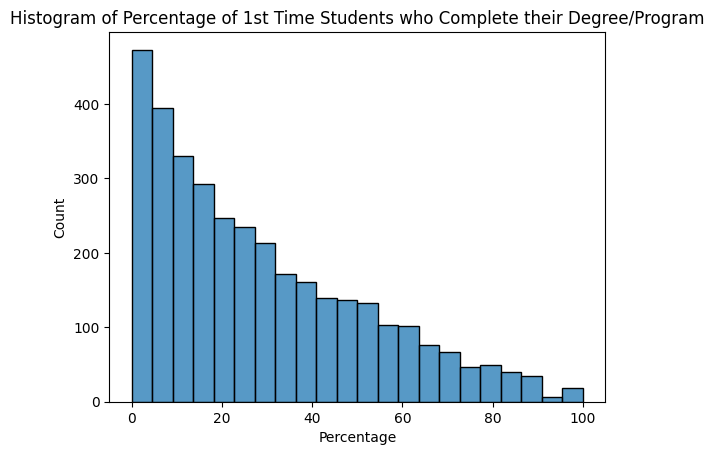

In [ ]:
# part 4:
print(sns.histplot(college["grad_100_value"]).set(title = 'Histogram of Percentage of 1st Time Students who Complete their Degree/Program',
                                                  xlabel = 'Percentage'))

[Text(0.5, 1.0, 'Density Plot of Percentage of 1st Time Students who Complete their Degree/Program'), Text(0.5, 0, 'Percentage')]
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64












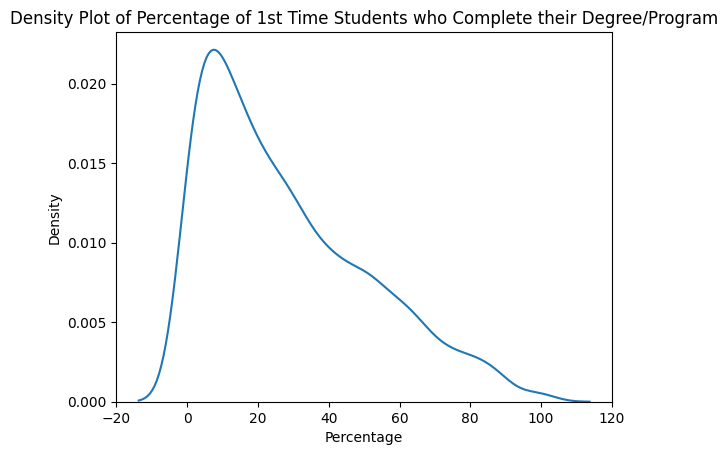

In [ ]:
# part 4 (continued):
print(sns.kdeplot(college["grad_100_value"]).set(title ='Density Plot of Percentage of 1st Time Students who Complete their Degree/Program',
                                                  xlabel='Percentage'))
print(college['grad_100_value'].describe())
print("\n")

       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0




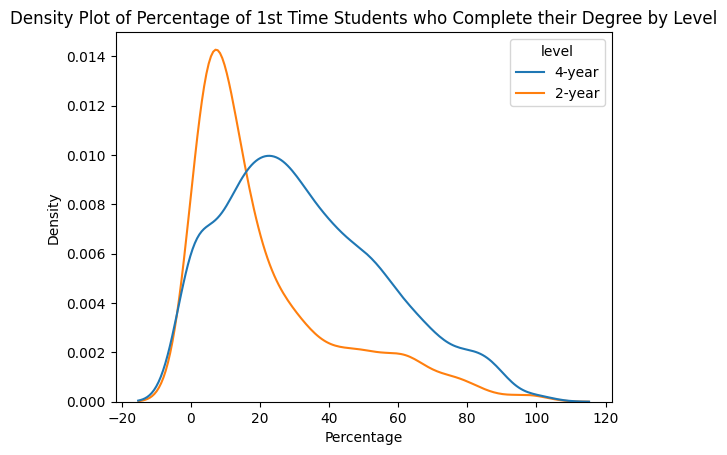

In [ ]:
# part 5:
sns.kdeplot(data=college, x='grad_100_value', hue='level').set(xlabel = "Percentage",
                                                               title = "Density Plot of Percentage of 1st Time Students who Complete their Degree by Level")
level_groups = college.loc[:,list(("grad_100_value", "level"))].groupby('level').describe()
print(level_groups)
print("\n")

[Text(0.5, 0, 'Percentage'), Text(0.5, 1.0, 'Density Plot of Percentage of 1st Time Students who Complete their Degree by Control')]
                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  




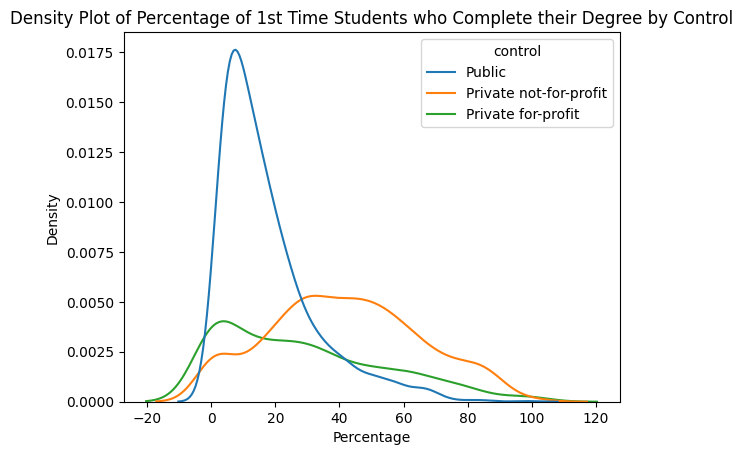

In [ ]:
# part 5 (cont):
print(sns.kdeplot(data=college, x='grad_100_value', hue='control').set(xlabel = "Percentage",
                                                               title = "Density Plot of Percentage of 1st Time Students who Complete their Degree by Control"))
control_groups = college.loc[:,list(("grad_100_value", "control"))].groupby('control').describe()
print(control_groups)
print("\n")

[Text(0.5, 0, 'Percentage'), Text(0.5, 1.0, 'Density Plot of Percentage of 1st Time Students who Complete their Degree by Level and Control Interaction')]






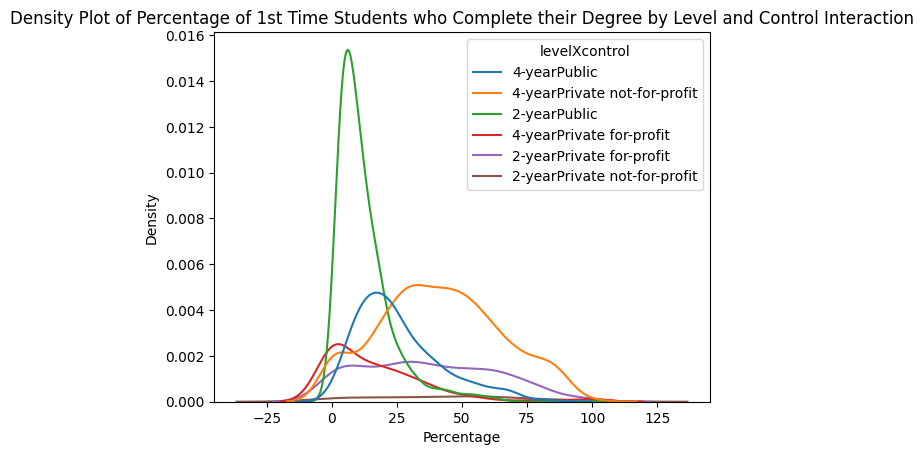

In [ ]:
# part 6:
college['levelXcontrol']= college['level'] + college['control']
print(sns.kdeplot(data=college, x='grad_100_value', hue='levelXcontrol').set(xlabel = "Percentage",
                                                               title = "Density Plot of Percentage of 1st Time Students who Complete their Degree by Level and Control Interaction"))

[Text(0.5, 1.0, 'Density Plot of Average Aid Given to Students'), Text(0.5, 0, 'Avereage Aid Given')]


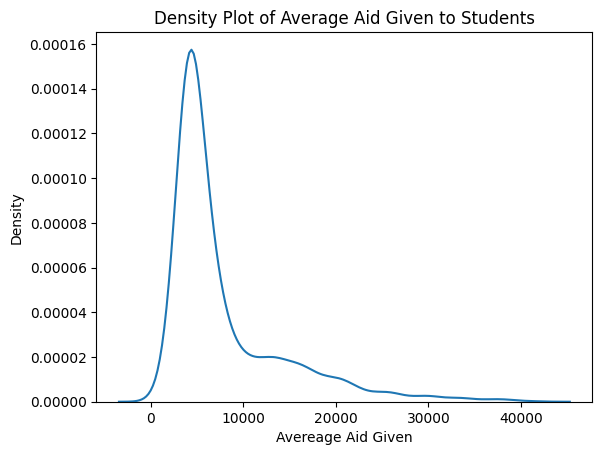

In [ ]:
# part 7:
print(sns.kdeplot(college["aid_value"]).set(title ='Density Plot of Average Aid Given to Students',
                                                  xlabel='Avereage Aid Given'))


[Text(0.5, 0, 'Average Aid Given'), Text(0.5, 1.0, 'Density Plot of Average Aid Given to Students by Control')]


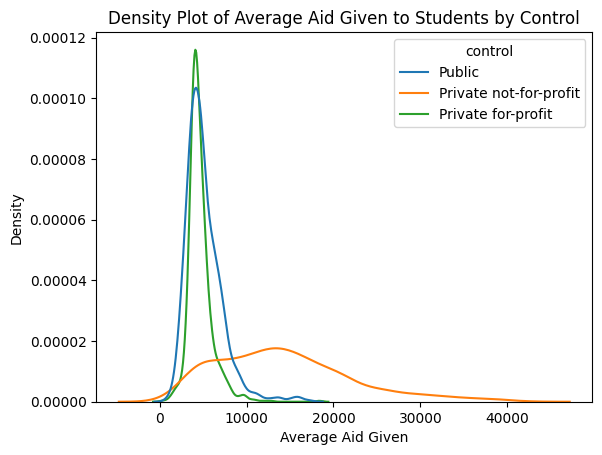

In [ ]:
# part 7 (cont):
print(sns.kdeplot(data=college, x='aid_value', hue='control').set(xlabel = "Average Aid Given",
                                                               title = "Density Plot of Average Aid Given to Students by Control"))
control_groups2 = college.loc[:,list(("aid_value", "control"))].groupby('control').describe()

[Text(0.5, 0, 'Average Aid Given'), Text(0.5, 1.0, 'Density Plot of Average Aid Given to Students by Level')]


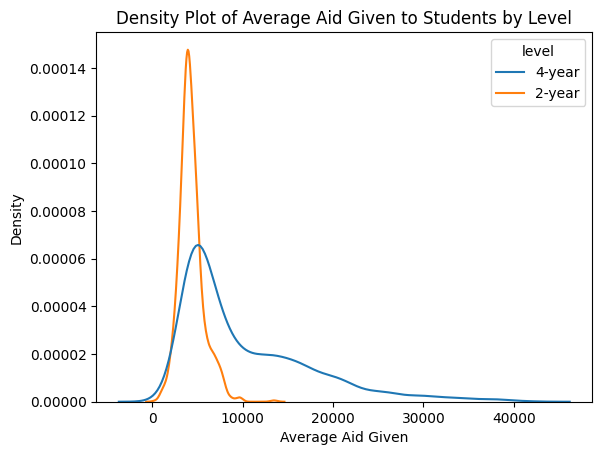

In [ ]:
# part 7 (cont):
print(sns.kdeplot(data=college, x='aid_value', hue='level').set(xlabel = "Average Aid Given",
                                                               title = "Density Plot of Average Aid Given to Students by Level"))
level_groups2 = college.loc[:,list(("aid_value", "level"))].groupby('level').describe()

[Text(0.5, 1.0, 'Scatter Plot of Percentage of Students who Graduate vs. Amount of Aid Value Given'),
 Text(0.5, 0, 'Aid Amount Given'),
 Text(0, 0.5, 'Percentage')]

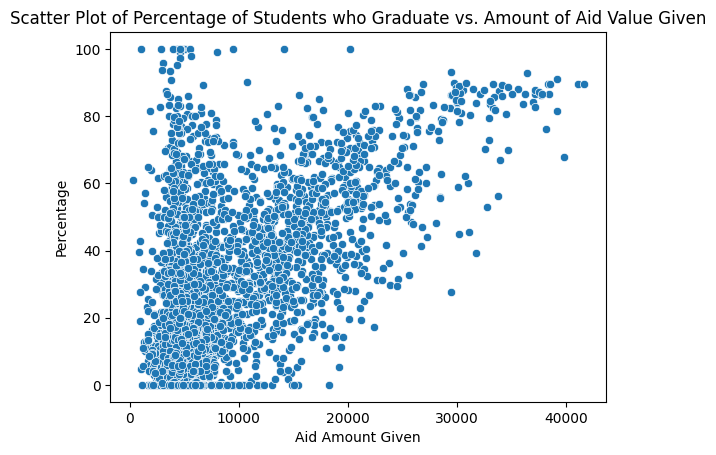

In [ ]:
# part 8:
sns.scatterplot(y = college["grad_100_value"], x = college["aid_value"]).set(title = "Scatter Plot of Percentage of Students who Graduate vs. Amount of Aid Value Given",
                                                                             xlabel = "Aid Amount Given",
                                                                             ylabel = "Percentage")

[Text(0.5, 1.0, 'Scatter Plot of Percentage of Students who Graduate vs. Amount of Aid Value Given')]

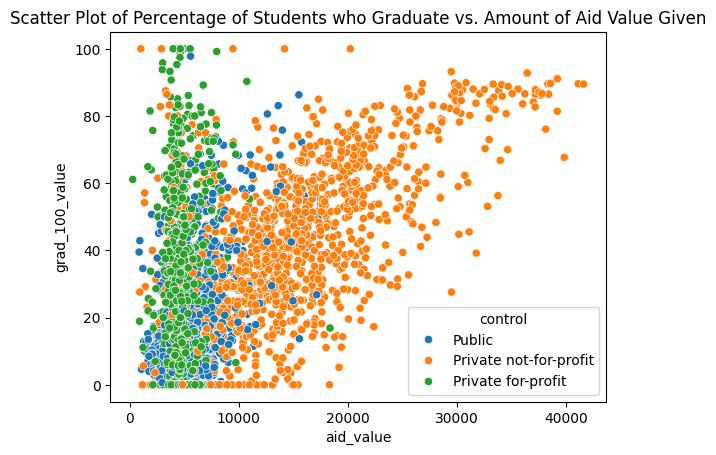

In [ ]:
# part 8 (cont):
sns.scatterplot(y = college["grad_100_value"], x = college["aid_value"], hue=college["control"]).set(title = "Scatter Plot of Percentage of Students who Graduate vs. Amount of Aid Value Given by Control",
                                                                                                     xlabel = "Amount of Aid Given",
                                                                                                     ylabel = "Percentage")

[Text(0.5, 1.0, 'Scatter Plot of Percentage of Students who Graduate vs. Amount of Aid Value Given by Level'),
 Text(0.5, 0, 'Amount of Aid Given'),
 Text(0, 0.5, 'Percentage')]

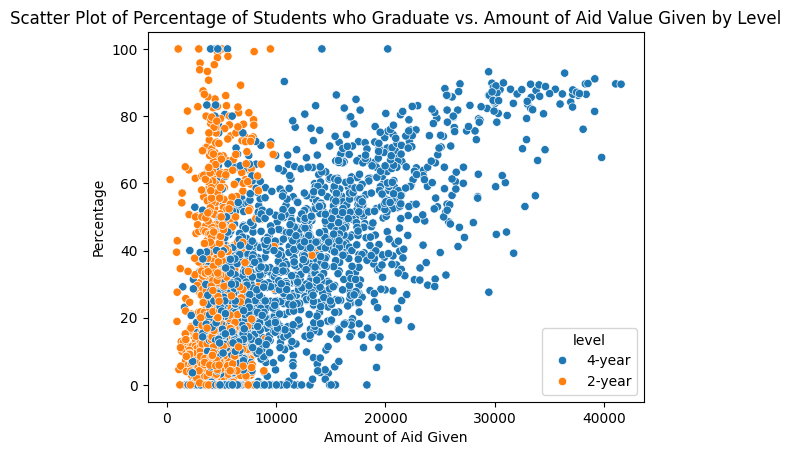

In [ ]:
# part 8 (cont):
sns.scatterplot(y = college["grad_100_value"], x = college["aid_value"], hue=college["level"]).set(title = "Scatter Plot of Percentage of Students who Graduate vs. Amount of Aid Value Given by Level",
                                                                                                     xlabel = "Amount of Aid Given",
                                                                                                     ylabel = "Percentage")

1. The dimensions of the data are 3798 by 63. There are 63 variables and 3798 observations.
2. When cross tabulating level and control, I see that the majority of institutions are 4-year colleges, with the most being private and not for profit. There seem to be more public 2 year institituions than 2 year private institutions. However, there seem to be a greater number of 2 year institutions that are public in comparison to their 4 year institution counterpart.
3. It seems that most institutionsare 4 year institutions in comparison to 2 year ones. Additionally, most students seem to be attending school in a 4 year private, not for profit school. Follwing that, it seems that most students are attending a 2 year, public school. Finally, the most common types of schools are public in comparison to the two other private levels.
5. It seems as though the students in 4 year schools are completing their program at higher rates than those in 2 year schools. Similarly, those in not for profit private schools seem to be completing school at a higher rate than any other level.
6. Looking at the kernel density plot, the 4 year, private not for profit school has the highest graduations rates. Nearly 50% of students from 4 year, private not for profit schools graduate.
7. It seems that private not for profit schools seem to be giving out more aid to their students in comparison to public and private for profit schools. The peak for private not for profit schools is further right on the graph in comparison to the other 2 school types.
8. It seems that there is a positive correlation between the aid given and graduation rates. As the aid value increased, the graduation rate also increased, indicating there could be a causal relationship between the 2 variables. However, more experimentation is required before determining whether the 2 variables have a causal relationship.


**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [22]:
# Part 1:
df = pd.read_csv('./visualization/assignment/data/puf2021_3_summer.csv')
print(df.shape)
df2 = df[["CVS_ONEDOSE", "FIS_AFFDMEAL", "RXS_NOFILLRX"]]

(7538, 140)


(7533, 3)

In [35]:
# Part 3:
df2[df2=='R']=np.nan
df2[df2=='D']=np.nan
df2 = df2.dropna()
df2 = df2.apply(pd.to_numeric)

[1 2]
[3 1 2]
[3 2 1]


<Axes: xlabel='CVS_ONEDOSE', ylabel='Count'>

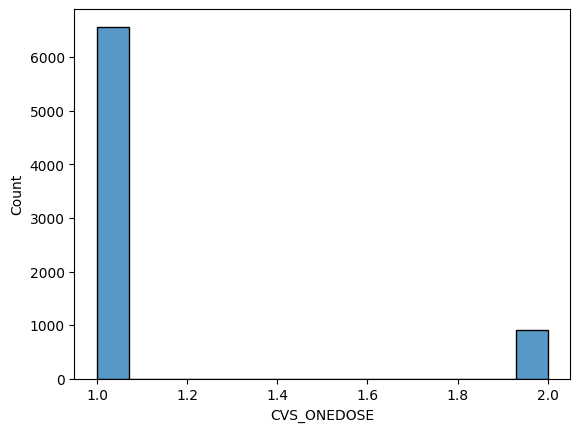

In [47]:
# part 4
sns.histplot(df2["CVS_ONEDOSE"])

<Axes: xlabel='FIS_AFFDMEAL', ylabel='Count'>

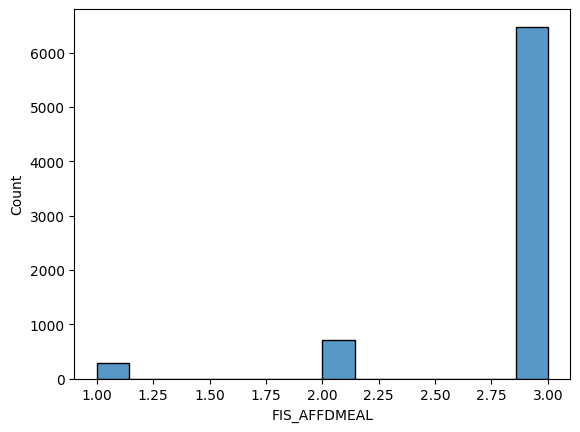

In [48]:
# part 4 (cont)
sns.histplot(df2["FIS_AFFDMEAL"])

<Axes: xlabel='RXS_NOFILLRX', ylabel='Count'>

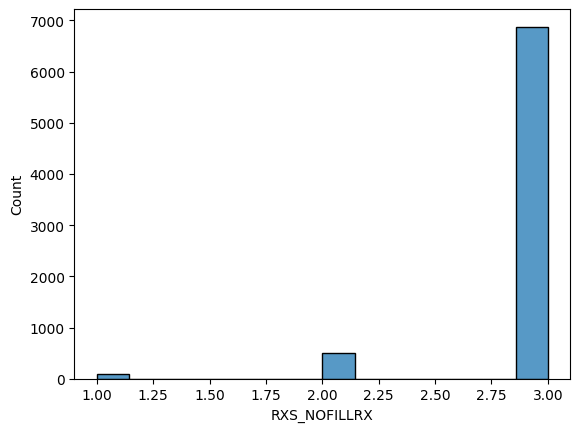

In [49]:
# part 4 (cont)
sns.histplot(df2["RXS_NOFILLRX"])

<Axes: xlabel='CVS_ONEDOSE', ylabel='Count'>

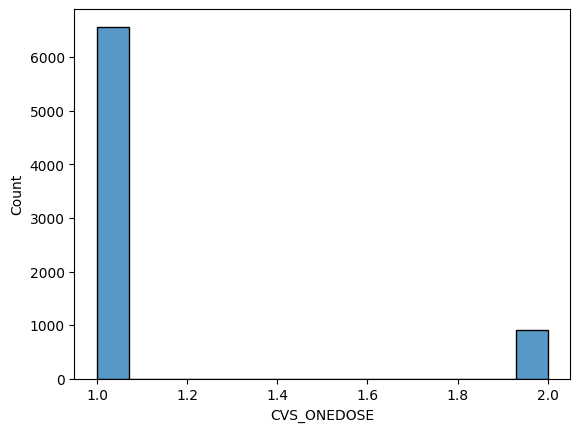

In [36]:
# part 5:
sns.histplot(data=df2,x='CVS_ONEDOSE')

<Axes: xlabel='CVS_ONEDOSE', ylabel='RXS_NOFILLRX'>

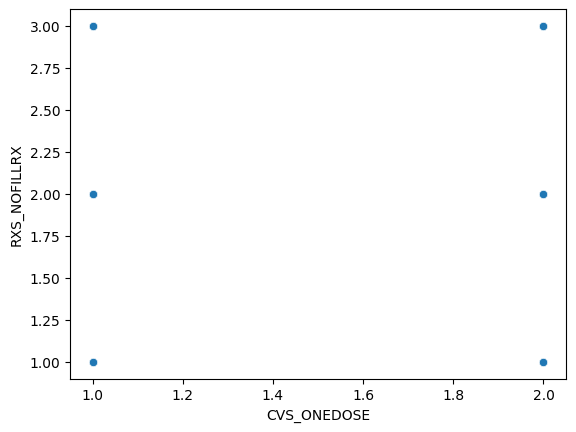

In [53]:
# part 6:
sns.scatterplot(data=df2,x="CVS_ONEDOSE", y="RXS_NOFILLRX")

In [41]:
# part 7:
cross_tab2 = pd.crosstab(df2["FIS_AFFDMEAL"], df2["CVS_ONEDOSE"])
print(cross_tab2)

CVS_ONEDOSE      1    2
FIS_AFFDMEAL           
1              222   72
2              555  156
3             5789  688


2. When there are missing observation, the CAPI program will use follow up questions and update and allow the interviewer to transmit the data to the NORC office. For missing values, the observations will have "." as their value.

3. I picked the CVS_ONEDOSE to see how many individuals were willing to take the COVID-19 vaccine during the pandemic. I decided to see whether factors like food security, the FIS_AFFDMEAL variable, and health insurance coverage, the RXS_NOFILLRX variable, had any correlations to the number of people who took the vaccine. I decided to drop the NA's because the sample was quite large. Additionally, I decided to drop the observations for those who did not respond and for those who did not know. I then made it so that the data was numeric.
4. It appears that there are no outliers. However, since we are looking at categorical data, it is quite difficult to determine if there are outliers.
5. There might be a need to transfore the variable because the CVS_ONEDOSE is concentrated around "1" meaning most people had the vaccine.
6. There is no relationship that can determined from the scatterplot because there are only 6 points. Since we are working with categorical data rather than numeric data, it does not make sense to use a scatter plot to draw any conclusions.
7. It seems that most people have never needed to skip filling their medication for money purposes and subsequently also had the most individuals who have taken the vaccine, indicating that having access to a form of health care and health insurance may be correlated with individuasl who are more willing to take vaccines. Additionally, as the amount of times people who skip purchasing their medication increases, the proportion of individuals who also have not taken a covid dose also increased, indicating that health insurance and access to medical care may play a role in vaccination rates.